In [ ]:
pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl

In [ ]:
df = pd.read_csv("brfss2020.csv")

In [ ]:
df.shape

(401958, 279)

In [ ]:
df_selected = df[['SEXVAR', 'CHECKUP1', 'EXERANY2', 'CVDINFR4', 'DIABETE4', 'INSULIN1', 'BLDSUGAR', 'DOCTDIAB', 'CHKHEMO3', 'DIABEDU', '_RFBMI5', '_RFSMOK3']]
df_selected.head()

,SEXVAR,CHECKUP1,EXERANY2,CVDINFR4,DIABETE4,INSULIN1,BLDSUGAR,DOCTDIAB,CHKHEMO3,DIABEDU,_RFBMI5,_RFSMOK3
0,2.0,4.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0
1,2.0,1.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,9.0
2,2.0,1.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,9.0,1.0
3,2.0,2.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,9.0,1.0
4,2.0,1.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0


In [ ]:
df_selected.isnull().sum()       # indicates the number of missing values

SEXVAR           0
CHECKUP1         5
EXERANY2         3
CVDINFR4         6
DIABETE4         6
INSULIN1    388849
BLDSUGAR    388850
DOCTDIAB    388850
CHKHEMO3    388850
DIABEDU     388850
_RFBMI5          0
_RFSMOK3         0
dtype: int64

In [ ]:
df_selected.isnull().any()     #ach column in the df_selected DataFrame to determine if there are any missing values (True) or none (False)

SEXVAR      False
CHECKUP1     True
EXERANY2     True
CVDINFR4     True
DIABETE4     True
INSULIN1     True
BLDSUGAR     True
DOCTDIAB     True
CHKHEMO3     True
DIABEDU      True
_RFBMI5     False
_RFSMOK3    False
dtype: bool

In [ ]:
df_selected.count()

SEXVAR      401958
CHECKUP1    401953
EXERANY2    401955
CVDINFR4    401952
DIABETE4    401952
INSULIN1     13109
BLDSUGAR     13108
DOCTDIAB     13108
CHKHEMO3     13108
DIABEDU      13108
_RFBMI5     401958
_RFSMOK3    401958
dtype: int64

2.0    218016
1.0    183942
Name: Gender, dtype: int64

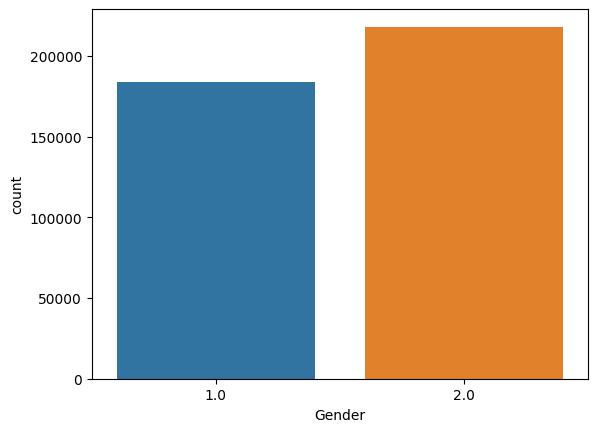

In [ ]:
df_selected = df_selected.rename(columns={"SEXVAR":"Gender"})


sns.countplot(data= df_selected, x='Gender')
df_selected.Gender.value_counts(sort=False)

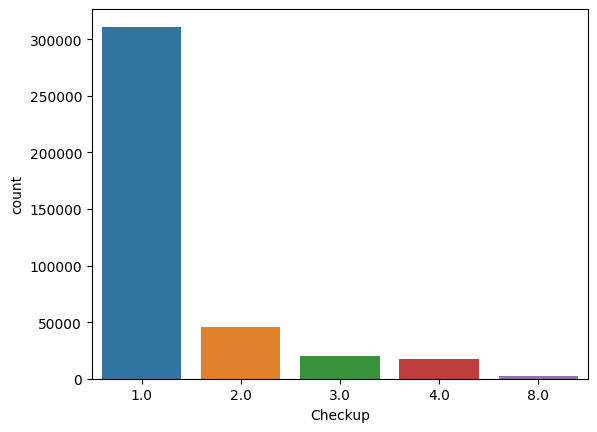

In [ ]:
df_selected = df_selected.rename(columns={"CHECKUP1":"Checkup"})
sns.countplot(x="Checkup", data=df_selected)
df_selected.Checkup.value_counts(sort=False)

#Values of 7 or 9 are equivelent to null
df_selected.loc[df_selected['Checkup'] == 9.0, 'Checkup'] = np.nan
df_selected.loc[df_selected['Checkup'] == 7.0, 'Checkup'] = np.nan



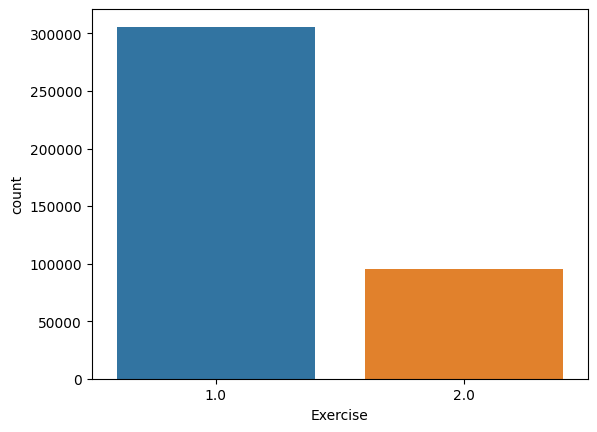

In [ ]:
df_selected = df_selected.rename(columns={"EXERANY2":"Exercise"})
sns.countplot(x="Exercise", data=df_selected)
df_selected.Exercise.value_counts(sort=False)

#Values of 7 or 9 are equivelent to null
df_selected.loc[df_selected['Exercise'] == 9.0, 'Exercise'] = np.nan
df_selected.loc[df_selected['Exercise'] == 7.0, 'Exercise'] = np.nan


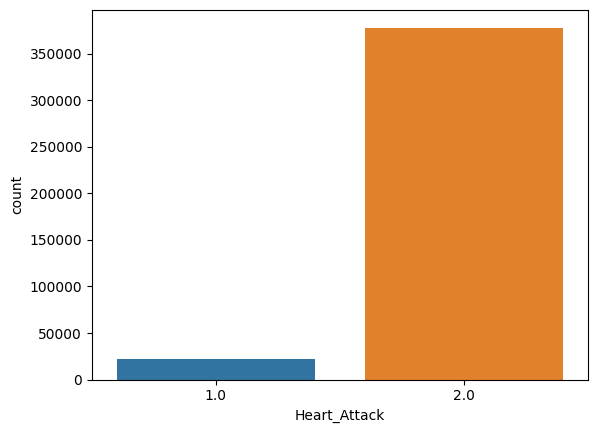

In [ ]:
df_selected = df_selected.rename(columns={"CVDINFR4":"Heart_Attack"})
sns.countplot(x="Heart_Attack", data=df_selected)
df_selected.Heart_Attack.value_counts(sort=False)

df_selected.loc[df_selected['Heart_Attack'] == 9.0, 'Heart_Attack'] = np.nan
df_selected.loc[df_selected['Heart_Attack'] == 7.0, 'Heart_Attack'] = np.nan


1.0    52094
Name: Diabetes, dtype: int64

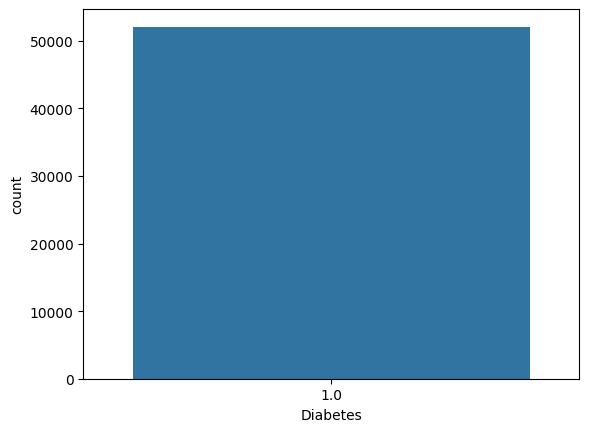

In [ ]:
df_selected = df_selected.rename(columns={"DIABETE4":"Diabetes"})

#Values other than 1 are not apart of our population, dropping those values.
df_selected.drop(df_selected[df_selected['Diabetes'] == 9].index, inplace= True)
df_selected.drop(df_selected[df_selected['Diabetes'] == 7].index, inplace= True)
df_selected.drop(df_selected[df_selected['Diabetes'] == 3].index, inplace= True)
df_selected.drop(df_selected[df_selected['Diabetes'] == 4].index, inplace= True)
df_selected.drop(df_selected[df_selected['Diabetes'] == 2].index, inplace= True)
sns.countplot(x="Diabetes", data=df_selected)
df_selected.Diabetes.value_counts(sort=False)

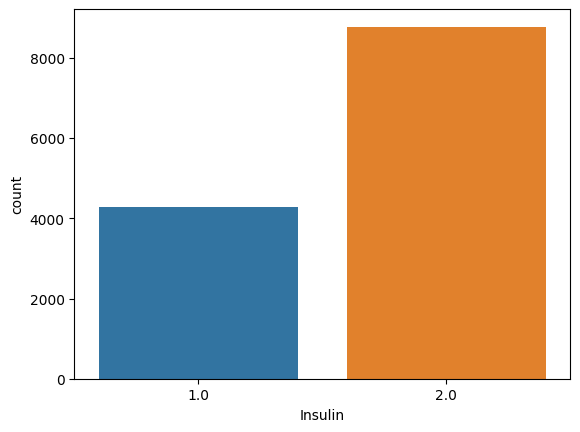

In [ ]:
df_selected = df_selected.rename(columns={"INSULIN1":"Insulin"})
sns.countplot(x="Insulin", data=df_selected)
df_selected.Insulin.value_counts(sort=False)

df_selected.loc[df_selected["Insulin"] == 9.0, "Insulin"] = np.nan
df_selected.loc[df_selected["Insulin"] == 7.0, "Insulin"] = np.nan


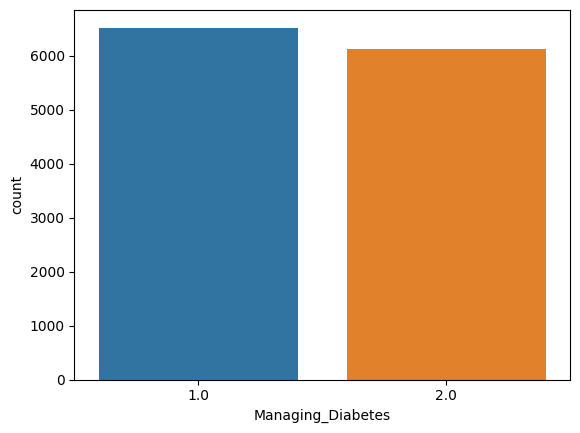

In [ ]:
df_selected = df_selected.rename(columns={"DIABEDU":"Managing_Diabetes"})

sns.countplot(x="Managing_Diabetes", data=df_selected)
df_selected.Managing_Diabetes.value_counts(sort=False)


#7 and 9 are equivelent to null for this feature
df_selected.loc[df_selected['Managing_Diabetes'] == 9.0, 'Managing_Diabetes'] = np.nan
df_selected.loc[df_selected['Managing_Diabetes'] == 7.0, 'Managing_Diabetes'] = np.nan


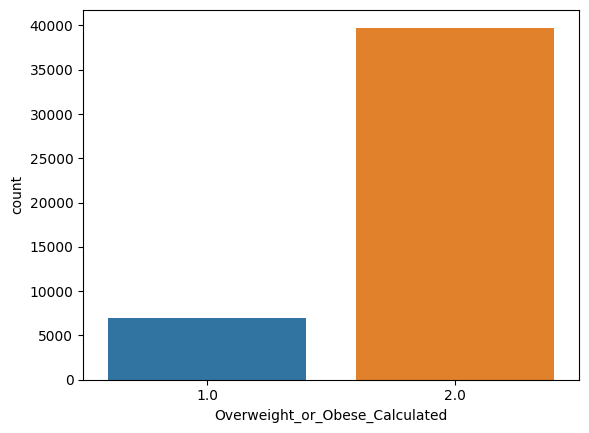

In [ ]:
df_selected = df_selected.rename(columns={"_RFBMI5":"Overweight_or_Obese_Calculated"})

sns.countplot(x="Overweight_or_Obese_Calculated", data=df_selected)
df_selected.Overweight_or_Obese_Calculated.value_counts(sort=False)

#9 is equivelent to null for this feature.
df_selected.loc[df_selected["Overweight_or_Obese_Calculated"] == 9.0, "Overweight_or_Obese_Calculated"] = np.nan


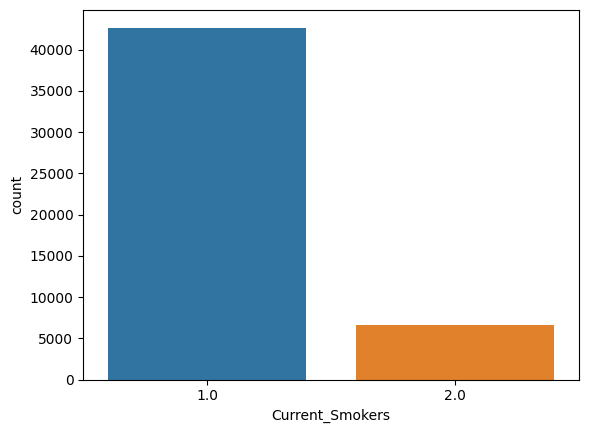

In [ ]:
df_selected = df_selected.rename(columns={"_RFSMOK3":"Current_Smokers"})

sns.countplot(x="Current_Smokers", data=df_selected)
df_selected.Current_Smokers.value_counts(sort=False)

#9 is equivelent to null for this feature
df_selected.loc[df_selected["Current_Smokers"] == 9.0, "Current_Smokers"] = np.nan


In [ ]:
df_selected.info()
df_selected.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51699 entries, 0 to 401951
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          51699 non-null  float64
 1   Checkup                         51343 non-null  float64
 2   Exercise                        51576 non-null  float64
 3   Heart_Attack                    51289 non-null  float64
 4   Diabetes                        51693 non-null  float64
 5   Insulin                         12675 non-null  float64
 6   Dly_Sugar_Check                 12707 non-null  float64
 7   Diabetes_Checkup                12304 non-null  float64
 8   Glycosylated_Hemoglobin         12001 non-null  float64
 9   Managing_Diabetes               12653 non-null  float64
 10  Overweight_or_Obese_Calculated  46720 non-null  float64
 11  Current_Smokers                 49266 non-null  float64
dtypes: float64(12)
memory usage: 5.

,Gender,Checkup,Exercise,Heart_Attack,Diabetes,Insulin,Dly_Sugar_Check,Diabetes_Checkup,Glycosylated_Hemoglobin,Managing_Diabetes,Overweight_or_Obese_Calculated,Current_Smokers
0,2.0,4.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0
5,1.0,2.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0
7,2.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0
11,2.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0
15,1.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0


In [ ]:
import pandas as pd


df_selected.to_csv('cleanedm.csv', index=False)


In [ ]:
import csv

def process_csv(input_file, output_file):
    with open(input_file, 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        rows = list(csv_reader)
#Row is for how many times a patient checks the blood sugar. It is formated that if it is 100s, the tens and ones value are how many times the patient
#checks daily. If it 200s, the same applies only its weekly checks. If it is 300s, it is monthly. If it is 400s, it is yearly. 888 corresponds with none.
#The below code block strips away the first digit and checks to see if there is a second digit that is not zero. Then it normalizes data to daily checks
#from weekly, monthly, yearly so we all values are on the same scale. Rounds down to 5 digits.
        for row in rows:
            if row['Dly_Sugar_Check'].startswith('1'):
                row['Dly_Sugar_Check'] = row['Dly_Sugar_Check'][1:]
                if len(row['Dly_Sugar_Check']) > 0 and row['Dly_Sugar_Check'][0] == '0':
                    row['Dly_Sugar_Check'] = row['Dly_Sugar_Check'][1:]
            elif len(row['Dly_Sugar_Check']) == 5 and row['Dly_Sugar_Check'].startswith('2'):
                row['Dly_Sugar_Check'] = row['Dly_Sugar_Check'][1:]
                if len(row['Dly_Sugar_Check']) > 0 and row['Dly_Sugar_Check'][0] == '0':
                    row['Dly_Sugar_Check'] = row['Dly_Sugar_Check'][1:]
                    row['Dly_Sugar_Check'] = str(round(float(row['Dly_Sugar_Check']) / 7, 5))
            elif len(row['Dly_Sugar_Check']) == 5 and row['Dly_Sugar_Check'].startswith('3'):
                row['Dly_Sugar_Check'] = row['Dly_Sugar_Check'][1:]
                if len(row['Dly_Sugar_Check']) > 0 and row['Dly_Sugar_Check'][0] == '0':
                    row['Dly_Sugar_Check'] = row['Dly_Sugar_Check'][1:]
                    row['Dly_Sugar_Check']=str(round(float(row['Dly_Sugar_Check'])/30, 5))
            elif len(row['Dly_Sugar_Check']) == 5 and row['Dly_Sugar_Check'].startswith('4'):
                row['Dly_Sugar_Check'] = row['Dly_Sugar_Check'][1:]
                if len(row['Dly_Sugar_Check']) > 0 and row['Dly_Sugar_Check'][0] == '0':
                    row['Dly_Sugar_Check'] = row['Dly_Sugar_Check'][1:]
                    row['Dly_Sugar_Check']=str(round(float(row['Dly_Sugar_Check'])/365, 5))
            elif row['Dly_Sugar_Check'] == ('888.0'):
                row['Dly_Sugar_Check'] = ('0.0')

#88 corresponds with none so in the below two rows, replacing that zero.
        for row in rows:
            if row['Diabetes_Checkup'] == ('88.0'):
                row['Diabetes_Checkup'] = ('0.0')

        for row in rows:
            if row['Glycosylated_Hemoglobin'] == ('88.0'):
                row['Glycosylated_Hemoglobin'] = ('0.0')


    with open(output_file, 'w', newline='') as csv_file:
        fieldnames = csv_reader.fieldnames
        csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        csv_writer.writeheader()
        csv_writer.writerows(rows)

input_file = 'cleanedm.csv'
output_file = 'outputm.csv'

process_csv(input_file, output_file)

In [ ]:
df = pd.read_csv("outputm.csv")

In [ ]:
df_selected = df[['Gender', 'Checkup', 'Exercise', 'Heart_Attack', 'Diabetes', 'Insulin', 'Dly_Sugar_Check', 'Diabetes_Checkup', 'Glycosylated_Hemoglobin', 'Managing_Diabetes', 'Overweight_or_Obese_Calculated', 'Current_Smokers']]
df_selected.head()

,Gender,Checkup,Exercise,Heart_Attack,Diabetes,Insulin,Dly_Sugar_Check,Diabetes_Checkup,Glycosylated_Hemoglobin,Managing_Diabetes,Overweight_or_Obese_Calculated,Current_Smokers
0,2.0,4.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0
1,1.0,2.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0
2,2.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0
3,2.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0
4,1.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0


In [ ]:
df_selected.isnull().sum()

Gender                                0
Checkup                             356
Exercise                            123
Heart_Attack                        410
Diabetes                              6
Insulin                           39024
Dly_Sugar_Check                   38992
Diabetes_Checkup                  39395
Glycosylated_Hemoglobin           39698
Managing_Diabetes                 39046
Overweight_or_Obese_Calculated     4979
Current_Smokers                    2433
dtype: int64

In [ ]:
df_selected.isnull().any()

Gender                            False
Checkup                            True
Exercise                           True
Heart_Attack                       True
Diabetes                           True
Insulin                            True
Dly_Sugar_Check                    True
Diabetes_Checkup                   True
Glycosylated_Hemoglobin            True
Managing_Diabetes                  True
Overweight_or_Obese_Calculated     True
Current_Smokers                    True
dtype: bool

In [ ]:
df_selected.count()

Gender                            51699
Checkup                           51343
Exercise                          51576
Heart_Attack                      51289
Diabetes                          51693
Insulin                           12675
Dly_Sugar_Check                   12707
Diabetes_Checkup                  12304
Glycosylated_Hemoglobin           12001
Managing_Diabetes                 12653
Overweight_or_Obese_Calculated    46720
Current_Smokers                   49266
dtype: int64

In [ ]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 40.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load your data
df = pd.read_csv("/content/outputm.csv")
print(len(df.columns))

# Initialize the SimpleImputer with the desired strategy (mean, median, most_frequent, or constant)
imputer = SimpleImputer(strategy='most_frequent')  # You can choose a different strategy based on your requirements
df_new = pd.DataFrame()

# Fit and transform the dataset
df_new = imputer.fit_transform(df)

# Now, df contains the DataFrame with imputed values
df_imputed = pd.DataFrame(df_new, columns=df.columns[:])

12


In [ ]:
df_imputed.isnull().any()

Gender                            False
Checkup                           False
Exercise                          False
Heart_Attack                      False
Diabetes                          False
Insulin                           False
Dly_Sugar_Check                   False
Diabetes_Checkup                  False
Glycosylated_Hemoglobin           False
Managing_Diabetes                 False
Overweight_or_Obese_Calculated    False
Current_Smokers                   False
dtype: bool

In [ ]:
df_imputed.head()

,Gender,Checkup,Exercise,Heart_Attack,Diabetes,Insulin,Dly_Sugar_Check,Diabetes_Checkup,Glycosylated_Hemoglobin,Managing_Diabetes,Overweight_or_Obese_Calculated,Current_Smokers
0,2.0,4.0,1.0,2.0,1.0,2.0,1.0,4.0,2.0,1.0,1.0,2.0
1,1.0,2.0,1.0,2.0,1.0,2.0,1.0,4.0,2.0,1.0,2.0,1.0
2,2.0,1.0,1.0,2.0,1.0,2.0,1.0,4.0,2.0,1.0,2.0,2.0
3,2.0,1.0,2.0,2.0,1.0,2.0,1.0,4.0,2.0,1.0,2.0,1.0
4,1.0,1.0,2.0,2.0,1.0,2.0,1.0,4.0,2.0,1.0,2.0,2.0


In [ ]:
df_imputed.count()

Gender                            51699
Checkup                           51699
Exercise                          51699
Heart_Attack                      51699
Diabetes                          51699
Insulin                           51699
Dly_Sugar_Check                   51699
Diabetes_Checkup                  51699
Glycosylated_Hemoglobin           51699
Managing_Diabetes                 51699
Overweight_or_Obese_Calculated    51699
Current_Smokers                   51699
dtype: int64

In [ ]:
df_selected=df_imputed

In [ ]:
df_selected.describe()

,Gender,Checkup,Exercise,Heart_Attack,Diabetes,Insulin,Dly_Sugar_Check,Diabetes_Checkup,Glycosylated_Hemoglobin,Managing_Diabetes,Overweight_or_Obese_Calculated,Current_Smokers
count,51699.000000,51699.000000,51699.000000,51699.000000,51699.0,51699.000000,51699.000000,51699.000000,51699.000000,51699.000000,51699.000000,51699.000000
mean,1.520358,1.093155,1.390104,1.856225,1.0,1.918451,1.198956,3.841254,2.203060,1.118513,1.865413,1.127275
std,0.499590,0.454247,0.487778,0.350864,0.0,0.273679,3.336723,2.683183,2.133465,0.323218,0.341285,0.333284
min,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,1.0,2.000000,1.000000,4.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,1.000000,1.000000,2.000000,1.0,2.000000,1.000000,4.000000,2.000000,1.000000,2.000000,1.000000
75%,2.000000,1.000000,2.000000,2.000000,1.0,2.000000,1.000000,4.000000,2.000000,1.000000,2.000000,1.000000
max,2.000000,8.000000,2.000000,2.000000,1.0,2.000000,99.000000,76.000000,76.000000,2.000000,2.000000,2.000000


2.0    26902
1.0    24797
Name: Gender, dtype: int64

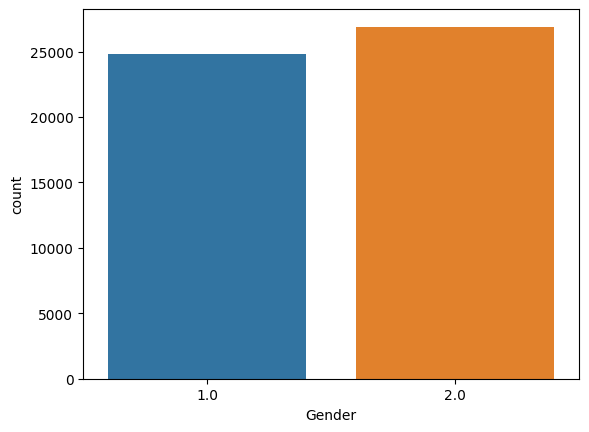

In [ ]:
sns.countplot(data= df_selected, x='Gender')
df_selected.Gender.value_counts(sort=False)

4.0      371
2.0     2149
1.0    48582
3.0      525
8.0       72
Name: Checkup, dtype: int64

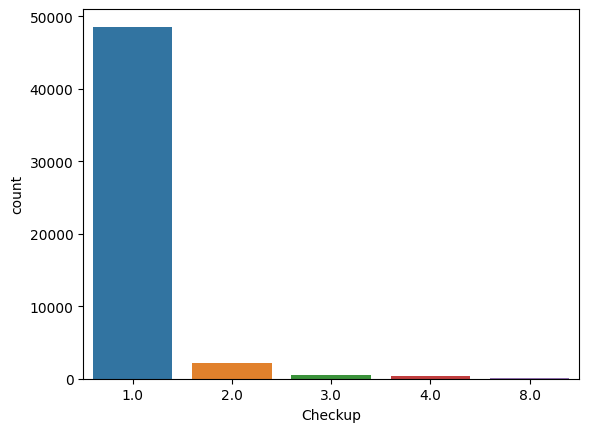

In [ ]:

sns.countplot(x="Checkup", data=df_selected)
df_selected.Checkup.value_counts(sort=False)

1.0    31531
2.0    20168
Name: Exercise, dtype: int64

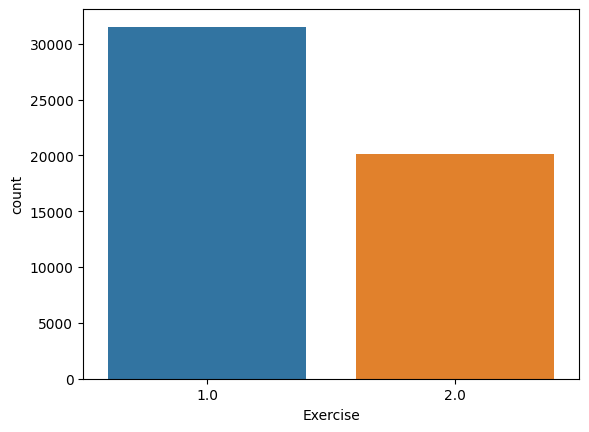

In [ ]:
sns.countplot(x="Exercise", data=df_selected)
df_selected.Exercise.value_counts(sort=False)

2.0    44266
1.0     7433
Name: Heart_Attack, dtype: int64

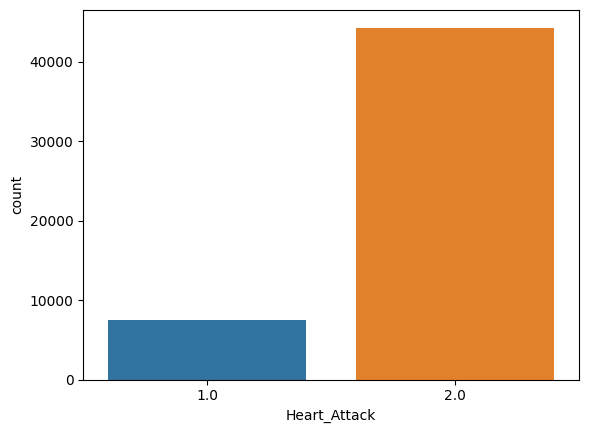

In [ ]:
sns.countplot(x="Heart_Attack", data=df_selected)
df_selected.Heart_Attack.value_counts(sort=False)

1.0    51699
Name: Diabetes, dtype: int64

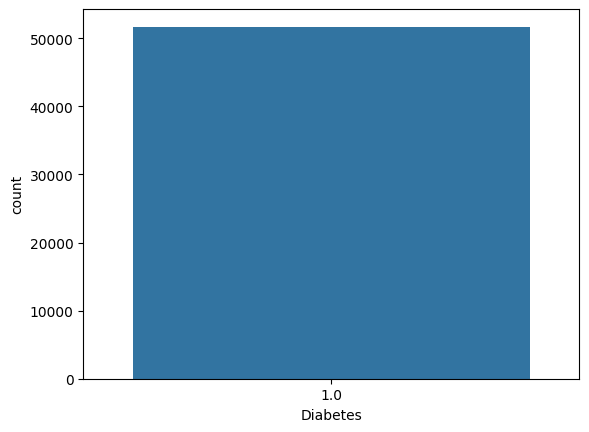

In [ ]:
sns.countplot(x="Diabetes", data=df_selected)
df_selected.Diabetes.value_counts(sort=False)

2.0    47483
1.0     4216
Name: Insulin, dtype: int64

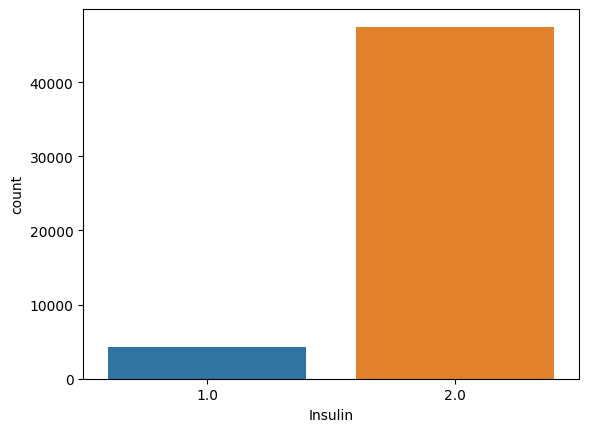

In [ ]:
sns.countplot(x="Insulin", data=df_selected)
df_selected.Insulin.value_counts(sort=False)

1.0    45572
2.0     6127
Name: Managing_Diabetes, dtype: int64

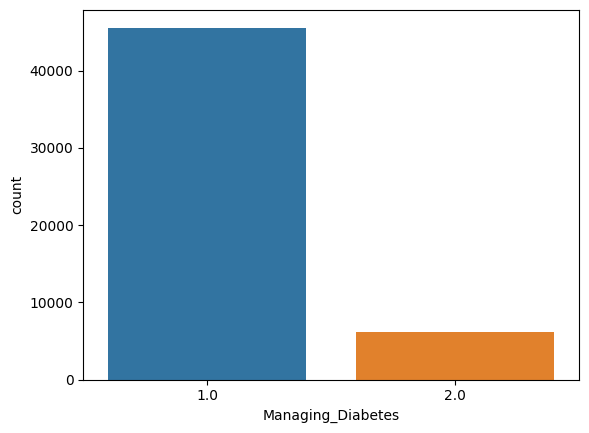

In [ ]:
sns.countplot(x="Managing_Diabetes", data=df_selected)
df_selected.Managing_Diabetes.value_counts(sort=False)

1.0     6958
2.0    44741
Name: Overweight_or_Obese_Calculated, dtype: int64

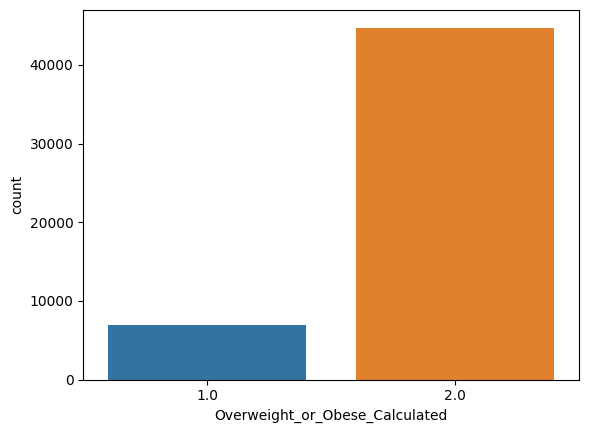

In [ ]:
sns.countplot(x="Overweight_or_Obese_Calculated", data=df_selected)
df_imputed.Overweight_or_Obese_Calculated.value_counts(sort=False)


2.0     6580
1.0    45119
Name: Current_Smokers, dtype: int64

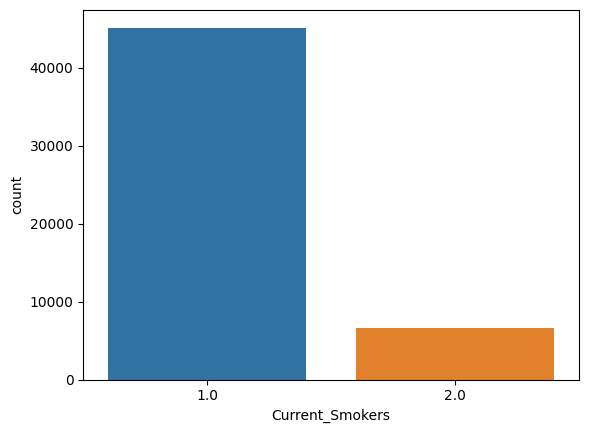

In [ ]:
sns.countplot(x="Current_Smokers", data=df_selected)
df_selected.Current_Smokers.value_counts(sort=False)

In [ ]:
df_selected.count()

Gender                            51699
Checkup                           51699
Exercise                          51699
Heart_Attack                      51699
Diabetes                          51699
Insulin                           51699
Dly_Sugar_Check                   51699
Diabetes_Checkup                  51699
Glycosylated_Hemoglobin           51699
Managing_Diabetes                 51699
Overweight_or_Obese_Calculated    51699
Current_Smokers                   51699
dtype: int64

In [ ]:
df_selected.info()
df_selected.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51699 entries, 0 to 51698
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          51699 non-null  float64
 1   Checkup                         51699 non-null  float64
 2   Exercise                        51699 non-null  float64
 3   Heart_Attack                    51699 non-null  float64
 4   Diabetes                        51699 non-null  float64
 5   Insulin                         51699 non-null  float64
 6   Dly_Sugar_Check                 51699 non-null  float64
 7   Diabetes_Checkup                51699 non-null  float64
 8   Glycosylated_Hemoglobin         51699 non-null  float64
 9   Managing_Diabetes               51699 non-null  float64
 10  Overweight_or_Obese_Calculated  51699 non-null  float64
 11  Current_Smokers                 51699 non-null  float64
dtypes: float64(12)
memory usage: 4.7

,Gender,Checkup,Exercise,Heart_Attack,Diabetes,Insulin,Dly_Sugar_Check,Diabetes_Checkup,Glycosylated_Hemoglobin,Managing_Diabetes,Overweight_or_Obese_Calculated,Current_Smokers
0,2.0,4.0,1.0,2.0,1.0,2.0,1.0,4.0,2.0,1.0,1.0,2.0
1,1.0,2.0,1.0,2.0,1.0,2.0,1.0,4.0,2.0,1.0,2.0,1.0
2,2.0,1.0,1.0,2.0,1.0,2.0,1.0,4.0,2.0,1.0,2.0,2.0
3,2.0,1.0,2.0,2.0,1.0,2.0,1.0,4.0,2.0,1.0,2.0,1.0
4,1.0,1.0,2.0,2.0,1.0,2.0,1.0,4.0,2.0,1.0,2.0,2.0


In [ ]:
df_imputed.to_csv('data_cleanm.csv', index=False)

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
pip install statsmodels

In [ ]:
import statsmodels.api as sm
import pylab as py
from scipy.special import ndtri
import scipy.stats as stats

In [ ]:
temmp = df_imputed

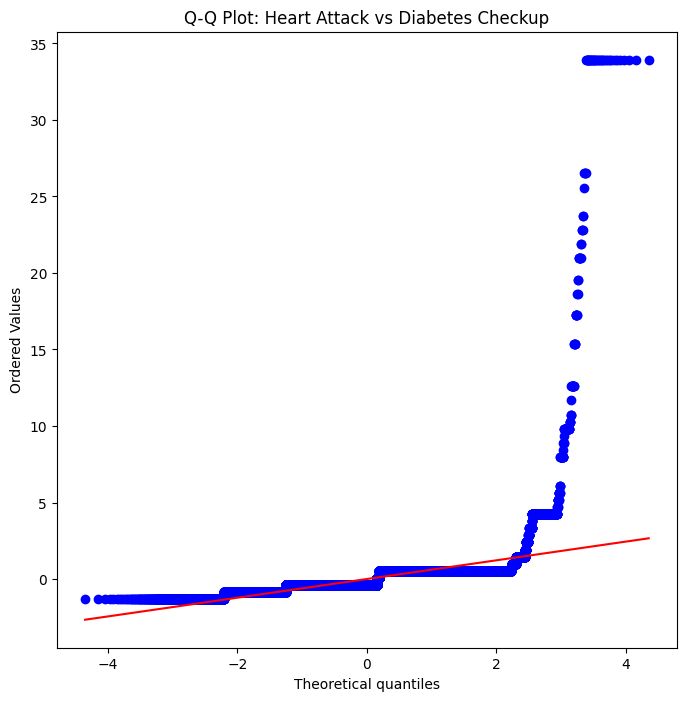

In [ ]:
combined_data = np.array(temmp[['Heart_Attack','Diabetes_Checkup']].values).flatten()
z = (combined_data - np.mean(combined_data)) / np.std(combined_data)
plt.figure(figsize=(8, 8))
stats.probplot(z, dist="norm", plot=plt)
plt.title('Q-Q Plot: Heart Attack vs Diabetes Checkup')
plt.show()

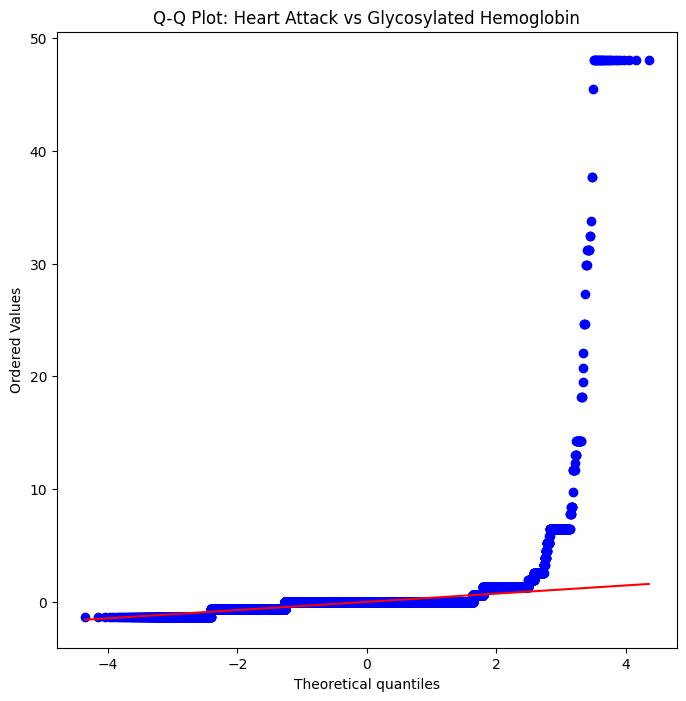

In [ ]:
combined_data = np.array(temmp[['Heart_Attack','Glycosylated_Hemoglobin']].values).flatten()
z = (combined_data - np.mean(combined_data)) / np.std(combined_data)
plt.figure(figsize=(8, 8))
stats.probplot(z, dist="norm", plot=plt)
plt.title('Q-Q Plot: Heart Attack vs Glycosylated Hemoglobin')
plt.show()

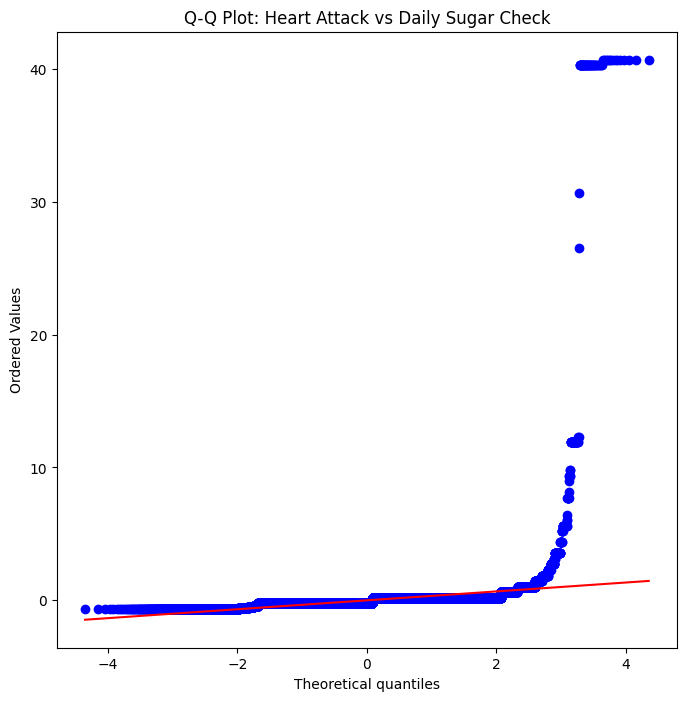

In [ ]:
combined_data = np.array(temmp[['Heart_Attack','Dly_Sugar_Check']].values).flatten()
z = (combined_data - np.mean(combined_data)) / np.std(combined_data)
plt.figure(figsize=(8, 8))
stats.probplot(z, dist="norm", plot=plt)
plt.title('Q-Q Plot: Heart Attack vs Daily Sugar Check')
plt.show()

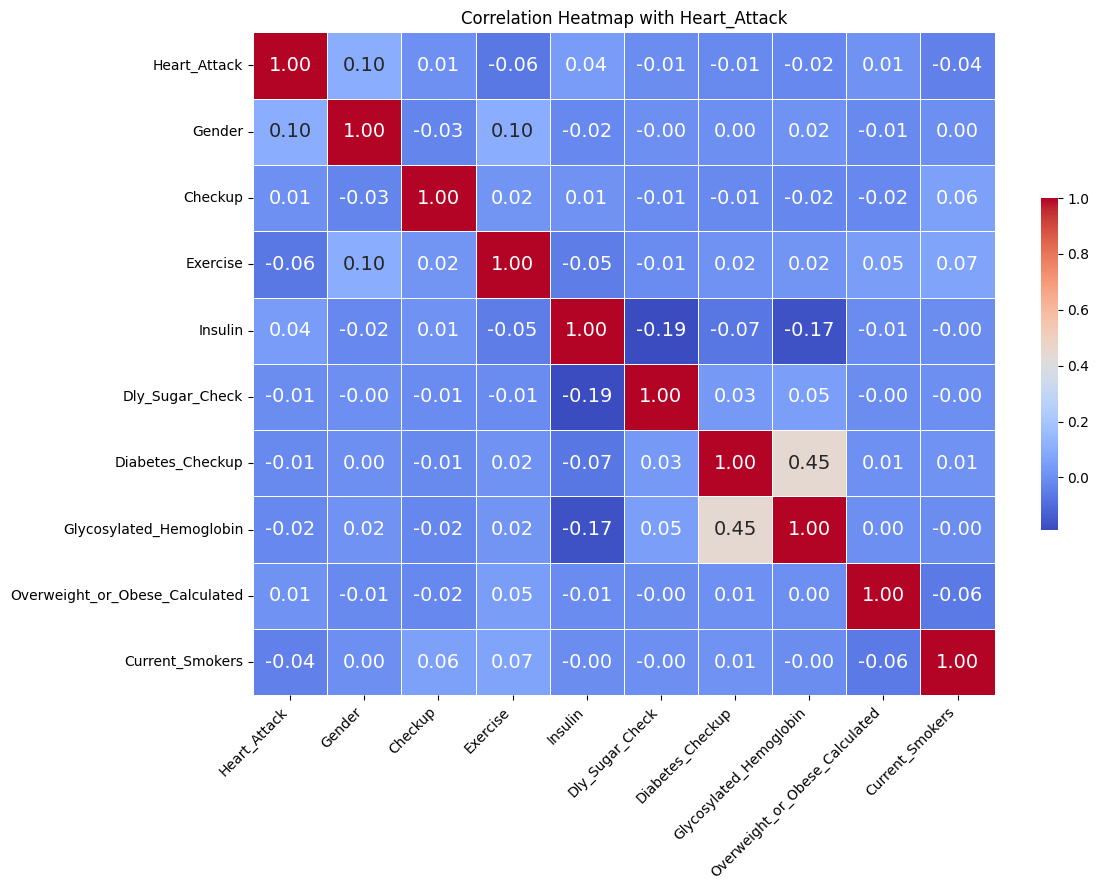

In [ ]:
#Correlation Analysis

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dep_var = 'Heart_Attack'
ind_vars = ['Gender', 'Checkup', 'Exercise', 'Insulin', 'Dly_Sugar_Check',
            'Diabetes_Checkup', 'Glycosylated_Hemoglobin',
            'Overweight_or_Obese_Calculated', 'Current_Smokers']

corr = df_imputed[[dep_var] + ind_vars].corr()

plt.figure(figsize=(12,9))

heatmap = sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f",
                      annot_kws={"size": 14},  # Smaller font size for the annotations.
                      linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks(rotation=45, ha='right')  # Rotate x labels for better visibility
plt.yticks(rotation=0)               # Rotate y labels to horizontal

# Set the title and adjust layout.
heatmap.set_title('Correlation Heatmap with Heart_Attack')
plt.tight_layout()
plt.show()

In [ ]:
#Chi- Square Test between 2 categorical variables - Heart Attack and Managing Diabetes

#Null Hypothesis: TThere is no statistically significant association between experiencing a heart attack and participation in classes for diabetes management.
#Alternate Hypothesis: There is a statistically significant association between experiencing a heart attack and participation in classes for diabetes management.
import scipy.stats

cont = pd.crosstab(temmp["Heart_Attack"],temmp["Managing_Diabetes"])
chi2_stat, p_value, dof, expected = scipy.stats.chi2_contingency(cont)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")

if p_value > 0.05:
    print("Conclusion: As p-value is greater than 0.05, we fail to reject the null hypothesis.")
else:
    print("Conclusion: As p-value is less than or equal to 0.05, we reject the null hypothesis.")


Chi-Square Statistic: 0.010115808789716728
P-Value: 0.9198859560614204
Degrees of Freedom: 1
Conclusion: As p-value is greater than 0.05, we fail to reject the null hypothesis.


In [ ]:
##Chi- Square Test between 2 categorical variables - Heart Attack and Exercise

#Null Hypothesis (H₀): There is no statistically significant association between experiencing a heart attack and engaging in exercise.
#Alternative Hypothesis (H₁): There is a statistically significant association between experiencing a heart attack and engaging in exercise.

cont = pd.crosstab(temmp["Heart_Attack"],temmp["Exercise"])
chi2_stat, p_value, dof, expected = scipy.stats.chi2_contingency(cont)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")

if p_value > 0.05:
    print("Conclusion: As p-value is greater than 0.05, we fail to reject the null hypothesis.")
else:
    print("Conclusion: As p-value is less than or equal to 0.05, we reject the null hypothesis.")

#P value is < 0.05, hence we reject the null hypothesis. There is a statisticall significant difference between experiencing a heart attack and engaging in exercise.

Chi-Square Statistic: 196.7732741177972
P-Value: 1.0568265603626291e-44
Degrees of Freedom: 1
Conclusion: As p-value is less than or equal to 0.05, we reject the null hypothesis.


In [ ]:
##Chi- Square Test between 2 categorical variables - Heart Attack and the use of Insulin

#Null Hypothesis (H₀): There is no statistically significant association between experiencing a heart attack and the use of insulin.
#Alternative Hypothesis (H₁): There is a statistically significant association between experiencing a heart attack and the use of insulin
cont = pd.crosstab(temmp["Heart_Attack"],temmp["Insulin"])
chi2_stat, p_value, dof, expected = scipy.stats.chi2_contingency(cont)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")

if p_value > 0.05:
    print("Conclusion: As p-value is greater than 0.05, we fail to reject the null hypothesis.")
else:
    print("Conclusion: As p-value is less than or equal to 0.05, we reject the null hypothesis.")

#P value is less than 0.05, we reject the null hypothesis. Hence, there is statistically significant association between experiencing a heart attack and the use of insulin.

Chi-Square Statistic: 94.59400640064109
P-Value: 2.337249395985841e-22
Degrees of Freedom: 1
Conclusion: As p-value is less than or equal to 0.05, we reject the null hypothesis.


In [ ]:
##Chi- Square Test between 2 categorical variables - Heart Attack and being obese

#Null Hypothesis (H₀): There is no statistically significant association between experiencing a heart attack and being overweight.
#Alternative Hypothesis (H₁): There is a statistically significant association between experiencing a heart attack and being overweight.

cont = pd.crosstab(temmp["Heart_Attack"],temmp["Overweight_or_Obese_Calculated"])
chi2_stat, p_value, dof, expected = scipy.stats.chi2_contingency(cont)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")

if p_value > 0.05:
    print("Conclusion: As p-value is greater than 0.05, we fail to reject the null hypothesis.")
else:
    print("Conclusion: As p-value is less than or equal to 0.05, we reject the null hypothesis.")

#P value is greater than 0.05, therefore we fail to reject the null hypothesis. Hence, there is no statistically significant difference among the two.

Chi-Square Statistic: 5.720147733486724
P-Value: 0.01677131923461379
Degrees of Freedom: 1
Conclusion: As p-value is less than or equal to 0.05, we reject the null hypothesis.


In [ ]:
##Chi- Square Test between 2 categorical variables - Heart Attack and Smoking status

#Null Hypothesis (H₀): There is no statistically significant association between experiencing a heart attack and being a smoker.
#Alternative Hypothesis (H₁):There is a statistically significant association between experiencing a heart attack and being a smoker.

cont = pd.crosstab(df_imputed["Heart_Attack"],df_imputed["Current_Smokers"])
chi2_stat, p_value, dof, expected = scipy.stats.chi2_contingency(cont)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")

if p_value > 0.05:
    print("Conclusion: As p-value is greater than 0.05, we fail to reject the null hypothesis.")
else:
    print("Conclusion: As p-value is less than or equal to 0.05, we reject the null hypothesis.")

Chi-Square Statistic: 88.73922159722328
P-Value: 4.504450718164406e-21
Degrees of Freedom: 1
Conclusion: As p-value is less than or equal to 0.05, we reject the null hypothesis.


In [ ]:
cont = pd.crosstab(df_imputed["Heart_Attack"],df_imputed["Gender"])
chi2_stat, p_value, dof, expected = scipy.stats.chi2_contingency(cont)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")

if p_value > 0.05:
    print("Conclusion: As p-value is greater than 0.05, we fail to reject the null hypothesis.")
else:
    print("Conclusion: As p-value is less than or equal to 0.05, we reject the null hypothesis.")

Chi-Square Statistic: 537.8678019519232
P-Value: 5.486424145611511e-119
Degrees of Freedom: 1
Conclusion: As p-value is less than or equal to 0.05, we reject the null hypothesis.


In [ ]:
cont = pd.crosstab(df_imputed["Heart_Attack"],df_imputed["Checkup"])
chi2_stat, p_value, dof, expected = scipy.stats.chi2_contingency(cont)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")

if p_value > 0.05:
    print("Conclusion: As p-value is greater than 0.05, we fail to reject the null hypothesis.")
else:
    print("Conclusion: As p-value is less than or equal to 0.05, we reject the null hypothesis.")

Chi-Square Statistic: 10.237368082324151
P-Value: 0.036613546148123864
Degrees of Freedom: 4
Conclusion: As p-value is less than or equal to 0.05, we reject the null hypothesis.


In [ ]:
#Hence, we notice an association between Heart Attack and gender, exercise, use of insulin and smoking status.

In [ ]:
#Null Hypothesis (H0): There is no statistically significant difference in the frequency of health check-ups between individuals who have had a heart attack and those who have not.
#Alternative Hypothesis (H1): There is a statistically significant difference in the frequency of health check-ups between individuals who have had a heart attack and those who have not.
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(df_imputed["Heart_Attack"], df_imputed["Diabetes_Checkup"])
print(f"Stat: {stat}")
print(f"P-Value: {p}")

if p > 0.05:
    print('Conclusion: As p-value is greater than 0.05, we fail to reject the null hypothesis.')
else:
    print('Conclusion: As p-value is less than or equal to 0.05, we reject the null hypothesis')

Stat: 232447869.0
P-Value: 0.0
Conclusion: As p-value is less than or equal to 0.05, we reject the null hypothesis


In [ ]:
#Null Hypothesis (H0): There is no statistically significant difference in the frequency of glucose checks between individuals who have had a heart attack and those who have not.
#Alternative Hypothesis (H1): There is a statistically significant difference in the frequency of glucose checks between individuals who have had a heart attack and those who have not.

stat, p = mannwhitneyu(df_imputed["Heart_Attack"], df_imputed["Dly_Sugar_Check"])
print(f"Stat: {stat}")
print(f"P-Value: {p}")

if p > 0.05:
    print('Conclusion: As p-value is greater than 0.05, we fail to reject the null hypothesis.')
else:
    print('Conclusion: As p-value is less than or equal to 0.05, we reject the null hypothesis')

Stat: 2354169198.5
P-Value: 0.0
Conclusion: As p-value is less than or equal to 0.05, we reject the null hypothesis


In [ ]:
#Null Hypothesis (H0): There is no statistically significant difference in the frequency of glycosylated hemoglobin (HbA1c) checks between individuals who have had a heart attack and those who have not.
#Alternative Hypothesis (H1): There is a statistically significant difference in the frequency of glycosylated hemoglobin (HbA1c) checks between individuals who have had a heart attack and those who have not.

stat, p = mannwhitneyu(df_imputed["Heart_Attack"], df_imputed["Glycosylated_Hemoglobin"])
print(f"Stat: {stat}")
print(f"P-Value: {p}")

if p > 0.05:
    print('Conclusion: As p-value is greater than 0.05, we fail to reject the null hypothesis.')
else:
    print('Conclusion: As p-value is less than or equal to 0.05, we reject the null hypothesis')

Stat: 1114261088.5
P-Value: 0.0
Conclusion: As p-value is less than or equal to 0.05, we reject the null hypothesis
